In [1]:

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd

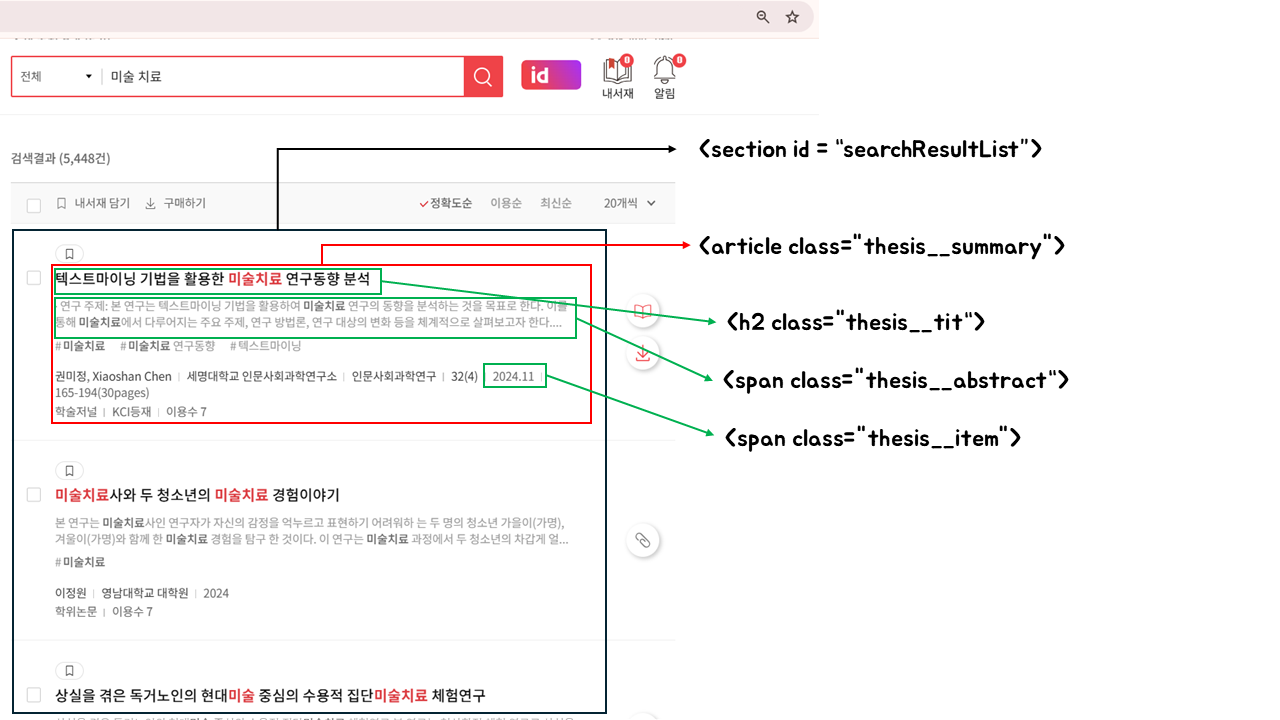

In [12]:
#DBpia는 동적 페이지임을 알 수 있다.
import requests
from bs4 import BeautifulSoup

response =requests.get('https://www.dbpia.co.kr/search/topSearch?query=%EB%AF%B8%EC%88%A0%20%EC%B9%98%EB%A3%8C#a')
html=response.text
soup=BeautifulSoup(html,'html.parser')
soup.select_one(".thesis__item").text



AttributeError: 'NoneType' object has no attribute 'text'

In [3]:
url = 'https://www.dbpia.co.kr/search/topSearch?query=%EB%AF%B8%EC%88%A0%20%EC%B9%98%EB%A3%8C#a'

res = []

driver = webdriver.Chrome() # 크롬 드라이버 생성
driver.get(url) # 사이트 접속하기

checkbox = driver.find_element(By.ID, 'domesticRecord_064001') # KCI 등재 체크박스

if not checkbox.is_selected(): # 만약 KCI 등재 체크박스가 체크되어 있지 않다면 체크
    checkbox.click()

driver.implicitly_wait(100) # 페이지 로딩이 완료될 때까지 대기

cnt = 0 
page = []

for n in range(1,100): # KCI에 등재된 논문은 총 1943건(한 페이지당 20건씩 있음)
    driver.execute_script("onclick=setPageNum({})".format(n))
    # 자바스크립트로 페이지가 이동되기 때문에 해당 코드를 실행
    time.sleep(10) # 페이지가 완전히 로드될 때까지 10초 대기
    html = driver.page_source 

    soup = BeautifulSoup(html, 'lxml') # 페이지 소스를 lxml로 변환
    # lxml : String형식의 HTML문서 -> 살아있는 HTML문서

    for_thesis = soup.find('section',attrs={"id":"searchResultList"}) # 논문 목록

    for i in for_thesis.find_all('article',attrs={'class':'thesis__summary'}):
        title = i.find('h2').get_text() # 제목 
        date = i.find('span',attrs={'class':'thesis__item'}).get_text() # 날짜
        abstract = i.find('span',attrs={'class':'thesis__abstract'}) # abstract 
        abstract2 = [abstract.get_text() if abstract != None else ''][0] 
        # 만약 abstract가 존재하지 않는다면 ''으로 대신함
        if date[:4] in [str(j) for j in range(2014,2024)]: # 2014~2023년에 해당되는 논문만(1430건)
            res += [[title, date, abstract2]] # [제목, 날짜, abstract 내용]을 리스트에 저장함
            cnt += 1

driver.close()

In [4]:
# 총 1430건의 논문 수집 성공
len(res)

1461

In [5]:
df = pd.DataFrame(res, columns=['제목','날짜','abstract'])
df.info()

df.to_csv('dbpia2014_2023_미술_치료.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제목        1461 non-null   object
 1   날짜        1461 non-null   object
 2   abstract  1461 non-null   object
dtypes: object(3)
memory usage: 34.4+ KB


In [7]:
dff = pd.read_csv('dbpia2014_2023_미술_치료.csv',encoding='utf-8')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   제목        1461 non-null   object 
 1   날짜        1461 non-null   float64
 2   abstract  1319 non-null   object 
dtypes: float64(1), object(2)
memory usage: 34.4+ KB


In [8]:
dff.head()

,제목,날짜,abstract
0,유분증 아동의 정서․행동 문제에 대한 미술치료 질적사례연구,2023.12,본 연구의 목적은 정서․행동 문제를 보이는 유분증 아동이 미술치료를 통해 어떠한 경...
1,틱 증상을 보이는 아동의 미술치료 경험에 관한 내러티브 탐구,2023.12,"본 연구는 틱 증상을 보이는 아동이 미술치료 과정에서 무엇을 경험하고, 그 경험의 ..."
2,미술치료사들의 직업 소명 의식에 대한해석 현상학적 분석(IPA),2023.12,본 연구는 미술치료사들이 체험한 직업 소명 의식의 의미와 본질을 밝히고자 하는 데 ...
3,복합외상 청소년의 속성-경험적 역동심리치료(Accelerated Experienti...,2023.12,본 연구는 복합외상 청소년에게 속성-경험적 역동심리치료(Accelerated Exp...
4,다문화 청소년의 미술치료 경험에 대한 주관적 인식연구: Q방법론적 접근,2023.80,본 연구는 다문화 청소년의 미술치료 경험에 대한 주관적인 인식을 바탕으로 이를 유형...
